In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
yas = [20,21,22,24,25,25,
       26,27,27,28,28,28,
       29,30,31,31,32,33,
       33,34,35,36]

In [3]:
gelir = [x**3/np.random.randint(2,4) for x in yas]

In [4]:
df = pd.DataFrame({"yas":yas,
                   "gelir":gelir})

In [5]:
df.head()

,yas,gelir
0,20,4000.000000
1,21,3087.000000
2,22,3549.333333
3,24,6912.000000
4,25,5208.333333


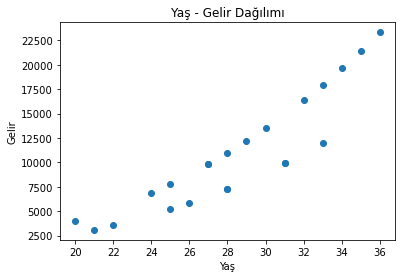

In [7]:
# veri gorsellestirme
import matplotlib.pyplot as plt
plt.scatter(df[["yas"]], df[["gelir"]])
plt.title("Yaş - Gelir Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Gelir")
plt.show()

In [10]:
df.corr()


,yas,gelir
yas,1.000000,0.910572
gelir,0.910572,1.000000


In [17]:
#  Statsmodels kütüphanesi üzerinden regresyon analizi yapacağız. 
# Bunun sebebi Statsmodels’in tek bir fonksiyonu ile modelin yorumlanmasına izin veren tabloyu verebilmesi. 
# Model yorumundan sonra ise Sklearn kütüphanesi ile makine öğrenmesini sağlayıp test edeceğiz.

import statsmodels.api as sm

x= df["yas"]
y_gercek= df["gelir"]


In [18]:
x = sm.add_constant(x)

In [19]:
model = sm.OLS(y_gercek,x).fit()

In [21]:
# modelin yorumlanması

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  gelir   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     97.06
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           4.07e-09
Time:                        23:12:08   Log-Likelihood:                -201.93
No. Observations:                  22   AIC:                             407.9
Df Residuals:                      20   BIC:                             410.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.262e+04   3434.397     -6.586      0.0

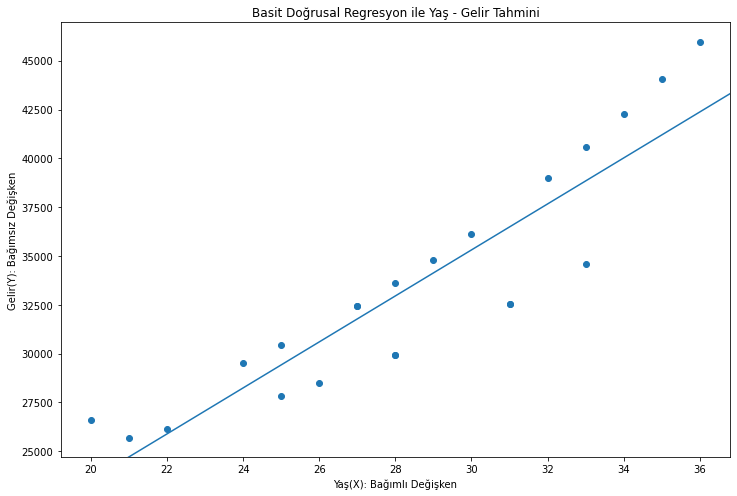

In [22]:
# model sonucunda olusan regresyon dogrusunu scatter plot ile cizdirelim.

fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(model,"yas" ,ax=ax)
plt.title("Basit Doğrusal Regresyon ile Yaş - Gelir Tahmini")
plt.xlabel("Yaş(X): Bağımlı Değişken")
plt.ylabel("Gelir(Y): Bağımsız Değişken")
plt.show()

In [24]:
# karsılastırma

y_pred_stat = model.predict(x)


karsilastirma = pd.DataFrame({'Gercek_Degerler': y_gercek, 'Tahmin_Degerler': y_pred_stat}).sort_index()

karsilastirma["tahminleme_hatalari"] = karsilastirma.Gercek_Degerler - karsilastirma.Tahmin_Degerler

print(karsilastirma)

    Gercek_Degerler  Tahmin_Degerler  tahminleme_hatalari
0       4000.000000       921.589642          3078.410358
1       3087.000000      2098.620423           988.379577
2       3549.333333      3275.651204           273.682129
3       6912.000000      5629.712767          1282.287233
4       5208.333333      6806.743548         -1598.410215
5       7812.500000      6806.743548          1005.756452
6       5858.666667      7983.774330         -2125.107663
7       9841.500000      9160.805111           680.694889
8       9841.500000      9160.805111           680.694889
9      10976.000000     10337.835892           638.164108
10      7317.333333     10337.835892         -3020.502559
11      7317.333333     10337.835892         -3020.502559
12     12194.500000     11514.866674           679.633326
13     13500.000000     12691.897455           808.102545
14      9930.333333     13868.928237         -3938.594903
15      9930.333333     13868.928237         -3938.594903
16     16384.0

In [25]:
lr= LinearRegression()


In [27]:
lr.fit(x,y_gercek)

LinearRegression()

In [28]:
y_pred_sklearn = lr.predict(x)

In [29]:
karsilastirma = pd.DataFrame({'Gercek_Degerler': y_gercek, 'Tahmin_Degerler': y_pred_sklearn}).sort_index()

In [30]:
karsilastirma["tahminleme_hatalari"] = karsilastirma.Gercek_Degerler - karsilastirma.Tahmin_Degerler
print(karsilastirma)

    Gercek_Degerler  Tahmin_Degerler  tahminleme_hatalari
0       4000.000000       921.589642          3078.410358
1       3087.000000      2098.620423           988.379577
2       3549.333333      3275.651204           273.682129
3       6912.000000      5629.712767          1282.287233
4       5208.333333      6806.743548         -1598.410215
5       7812.500000      6806.743548          1005.756452
6       5858.666667      7983.774330         -2125.107663
7       9841.500000      9160.805111           680.694889
8       9841.500000      9160.805111           680.694889
9      10976.000000     10337.835892           638.164108
10      7317.333333     10337.835892         -3020.502559
11      7317.333333     10337.835892         -3020.502559
12     12194.500000     11514.866674           679.633326
13     13500.000000     12691.897455           808.102545
14      9930.333333     13868.928237         -3938.594903
15      9930.333333     13868.928237         -3938.594903
16     16384.0

In [31]:
print("coefficients ",lr.coef_)  # katsayı
print("intercept",lr.intercept_) # Kesim noktası
print("r2 score",metrics.r2_score(y_gercek,y_pred_sklearn))
print('Mean Squared Error:', metrics.mean_squared_error(y_gercek, y_pred_sklearn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_gercek, y_pred_sklearn)))

coefficients  [   0.         1177.03078135]
intercept -22619.025985182005
r2 score 0.8291414728727098
Mean Squared Error: 5493231.501741078
Root Mean Squared Error: 2343.7643869939398
